# Pandas

In [1]:
import pandas as pd

## Reading market data for SNAP

In [3]:
data = pd.read_csv("snap.csv")
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,Aug 20 2018,11.80,11.86,11.57,11.73,11.73,13977800
1,Aug 17 2018,12.16,12.17,11.63,11.89,11.89,22444600
2,Aug 16 2018,12.30,12.58,12.10,12.17,12.17,14652900


In [5]:
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,12.951100,13.203800,12.680800,12.928400,12.928400,2.444593e+07
std,1.429399,1.447525,1.339162,1.380316,1.380316,1.902549e+07
min,10.560000,10.680000,10.500000,10.550000,10.550000,8.219500e+06
25%,12.147500,12.375000,11.925000,12.177500,12.177500,1.372595e+07
50%,13.085000,13.360000,12.875000,13.135000,13.135000,1.875875e+07
75%,13.712500,14.147500,13.622500,13.907500,13.907500,2.871392e+07
max,15.940000,16.120000,15.650000,15.870000,15.870000,1.592094e+08


In [7]:
import numpy as np
data = data.replace(r'-', np.nan, regex=True)
data["Low"] = pd.to_numeric(data["Low"])
data["Open"] = pd.to_numeric(data["Open"])

In [8]:
data = data.dropna()

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,12.951100,13.203800,12.680800,12.928400,12.928400,2.444593e+07
std,1.429399,1.447525,1.339162,1.380316,1.380316,1.902549e+07
min,10.560000,10.680000,10.500000,10.550000,10.550000,8.219500e+06
25%,12.147500,12.375000,11.925000,12.177500,12.177500,1.372595e+07
50%,13.085000,13.360000,12.875000,13.135000,13.135000,1.875875e+07
75%,13.712500,14.147500,13.622500,13.907500,13.907500,2.871392e+07
max,15.940000,16.120000,15.650000,15.870000,15.870000,1.592094e+08


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


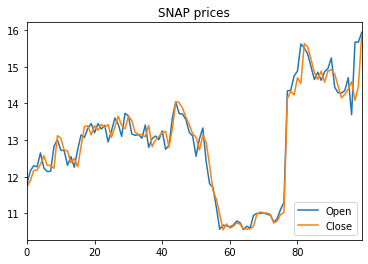

In [11]:
plt.figure()
data.Open.plot()
data.Close.plot()
plt.title("SNAP prices")
plt.legend(loc='lower right')

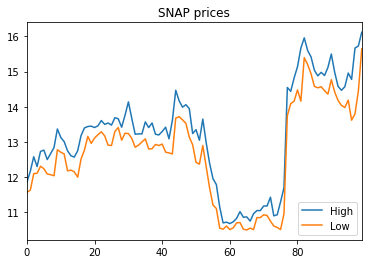

In [12]:

data.High.plot()
data.Low.plot()
plt.title("SNAP prices")
plt.legend(loc='lower right')

[]

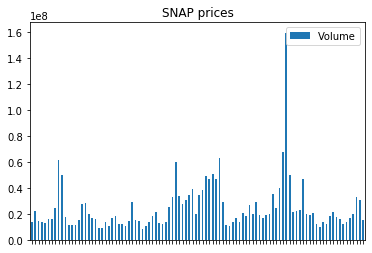

In [13]:
plt.figure()
g = data.Volume.plot.bar()
plt.title("SNAP prices")
plt.legend(loc='upper right')

g.set_xticklabels([])

### How many data points per month

In [14]:
data.groupby(pd.TimeGrouper(freq='M')).count()

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

In [ ]:
weekly = data.resample('W').mean()
weekly

In [ ]:
weekly.Open.plot()
plt.title("SNAP prices")
plt.legend(loc='upper center')

In [ ]:
weekly.Volume.plot()
plt.title("SNAP prices")
plt.legend(loc='lower center')

In [ ]:
data.Open.rolling(window=5,center=False).mean().plot()
data.Open.plot()
plt.legend(['rolling mean', 'original'], loc='upper center')

### Growth of a stock

In [ ]:
data = data.sort_index(ascending=True)
print data.head(3)
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1)))
print stock_change.head(3)
stock_change.Close.plot(grid = True).axhline(y = 0, color = "black", lw = 2)